In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Reading the data.

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let us first look at the shape of the data.

In [3]:
print('The no. of rows in the data is: ',df.shape[0])
print('The no. of columns in the data is: ',df.shape[1])

The no. of rows in the data is:  1338
The no. of columns in the data is:  7


### Data Cleaning and Formatting

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Let us look for NaN values in the dataset and display it on a heatmap.

In [5]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


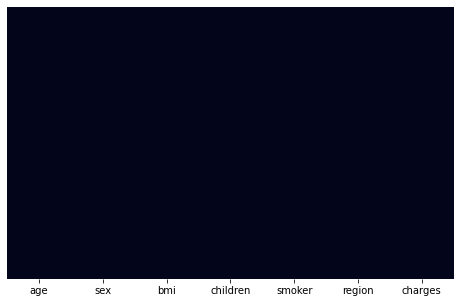

In [6]:
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(),cbar = False,yticklabels = False)
plt.show()

There is no missing or NaN values in the data. 


### Exploratory Data Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


__The target variable for our prediction is the feature "charges" . We can see that the difference between the minimum and maximum value is very large.__

Let us look at no. of (male and female) and (smokers and non-smokers) in the data and display it using a countplot.

In [8]:
for col in ['sex','smoker']:
    print('\nFeature: ',col)
    print(df[col].value_counts())


Feature:  sex
male      676
female    662
Name: sex, dtype: int64

Feature:  smoker
no     1064
yes     274
Name: smoker, dtype: int64


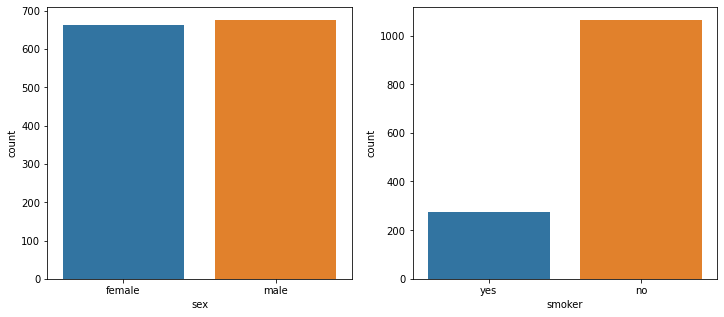

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='sex')

plt.subplot(1,2,2)
sns.countplot(data=df,x='smoker')

plt.show()

From the plot we can see that:
* The dataset has almost equal no. of male and female.
* The no. of people who smoke is comparitively very less to the non-smokers.

Now let us look at the distribution of sex with respect to smokers.

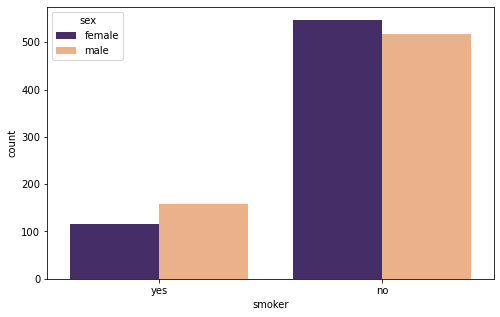

In [10]:
plt.figure(figsize = (8,5))
sns.countplot(data=df , x='smoker', hue='sex', palette=['#432371',"#FAAE7B"])
plt.show()

No. of male smokers is slightly more than the female smokers.

Let us look at region wise no. of insurances.

<Figure size 576x360 with 0 Axes>

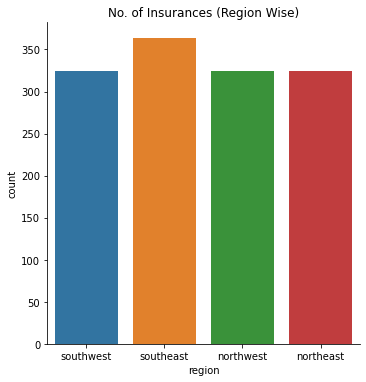

In [11]:
plt.figure(figsize = (8,5))
sns.catplot(data=df , x=df.region, kind='count')
plt.title("No. of Insurances (Region Wise)")
plt.show()

Every region has almost the same no. of insurance holders.

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now let us look at the distributions of our continous features in the dataset.

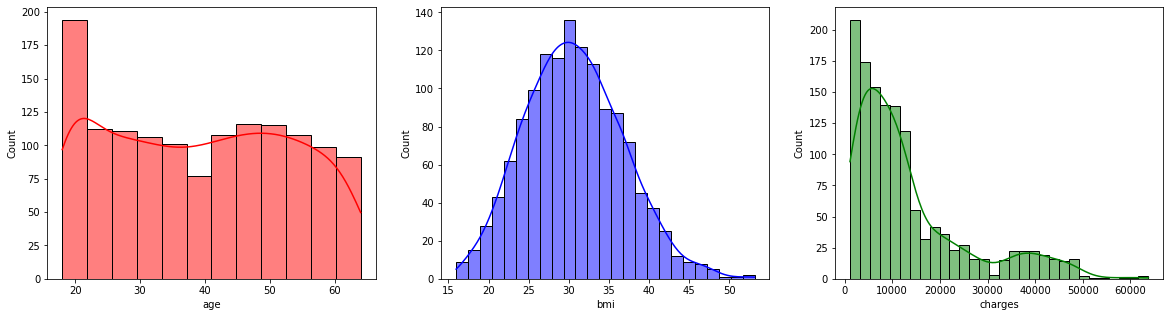

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.histplot(df.age, kde=True, color='r')

plt.subplot(1,3,2)
sns.histplot(df.bmi, kde=True, color='b')

plt.subplot(1,3,3)
sns.histplot(df.charges, kde=True, color='g')

plt.show()

__From the plots above we can see that :__
* The variable age follows a somewhat uniform distribution.
* Only 'bmi' follows a normal distribution with most of the values centered around the mean value (~30).
* The distribution of our target variable 'charges' is right skewed.

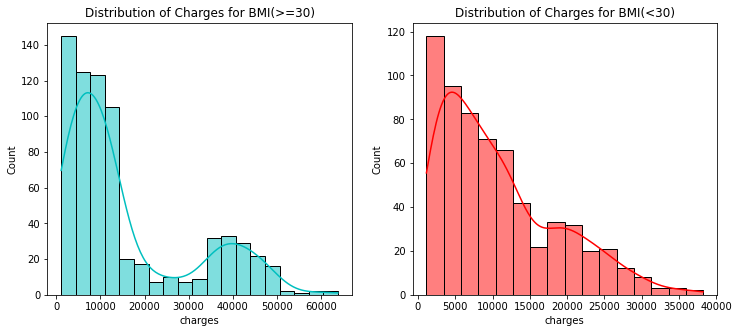

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df[(df['bmi']>=30)]['charges'],kde=True,color='c')
plt.title('Distribution of Charges for BMI(>=30)')

plt.subplot(1,2,2)
sns.histplot(df[(df['bmi']<30)]['charges'],kde=True,color='r')
plt.title('Distribution of Charges for BMI(<30)')

plt.show()

In [15]:
print('The average amount of money spent on insurance by people having BMI(>=30): ',df[(df['bmi']>=30)]['charges'].mean())
print('The average amount of money spent on insurance by people having BMI(<30): ',df[(df['bmi']<30)]['charges'].mean())

The average amount of money spent on insurance by people having BMI(>=30):  15552.335468868452
The average amount of money spent on insurance by people having BMI(<30):  10713.66690058478


__Obese people have to spend more on health isurance.__

In [16]:
df1 = df.copy()
df1['sex'] = df['sex'].map({'male':1,'female':0})
df1['smoker'] = df['smoker'].map({'yes':1,'no':0})

df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


<AxesSubplot:>

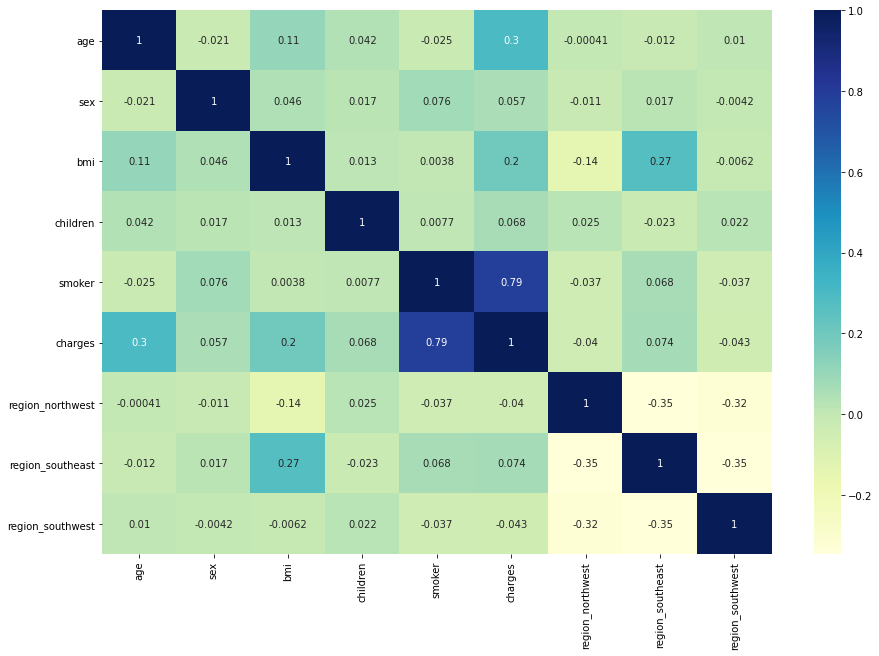

In [17]:
plt.figure(figsize = (15,10))
corr = df1.corr()
sns.heatmap(corr , mask = np.zeros_like(corr), annot=True, cmap='YlGnBu')

<Figure size 1080x720 with 0 Axes>

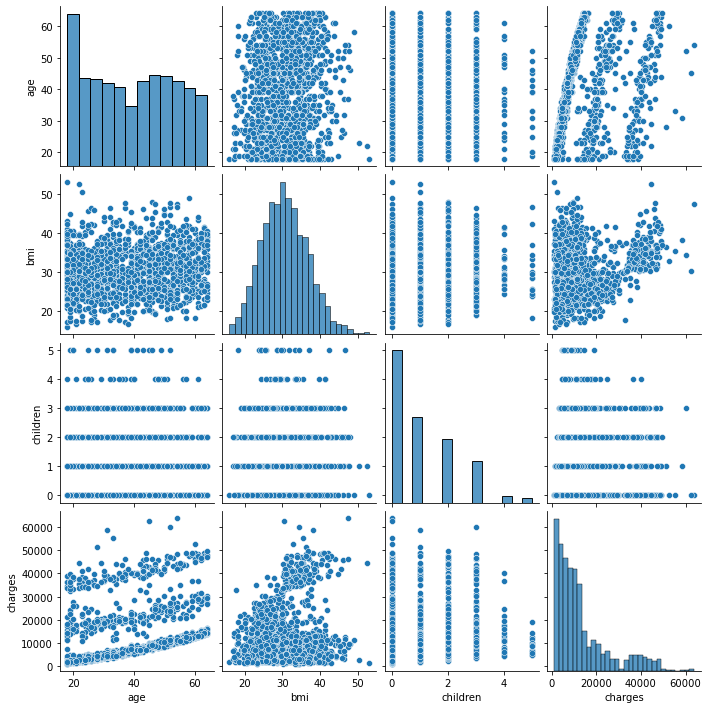

In [18]:
plt.figure(figsize = (15,10))
sns.pairplot(df)
plt.show()

A strong positive correlation is obsereved between the variable 'smoker' and the target variable 'charges'. Let us look into it in more detail.

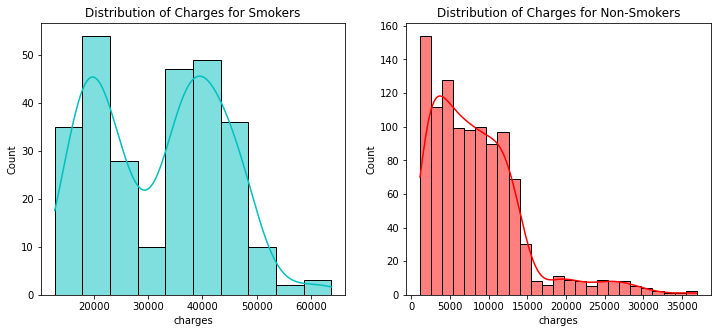

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df1[(df1['smoker']==1)]['charges'],kde=True,color='c')
plt.title('Distribution of Charges for Smokers')

plt.subplot(1,2,2)
sns.histplot(df1[(df1['smoker']==0)]['charges'],kde=True,color='r')
plt.title('Distribution of Charges for Non-Smokers')

plt.show()

In [20]:
print('The average amount of money spent on insurance by smokers: ',df1[(df1['smoker']==1)]['charges'].mean())
print('The average amount of money spent on insurance by non-smokers: ',df1[(df1['smoker']==0)]['charges'].mean())

The average amount of money spent on insurance by smokers:  32050.23183153285
The average amount of money spent on insurance by non-smokers:  8434.268297856199


__Smokers have to spend more on insurance than non-smokers.__

#### Boxplots for Continous Variables

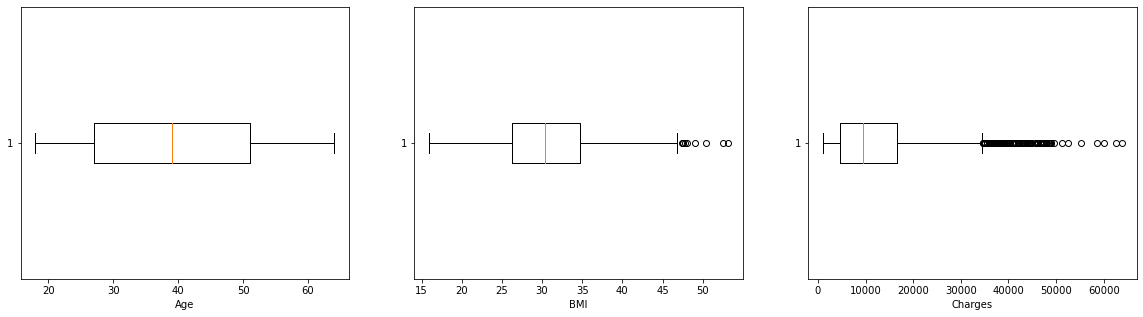

In [21]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.boxplot(df.age,vert=False)
plt.xlabel("Age")

plt.subplot(1,3,2)
plt.boxplot(df.bmi,vert=False)
plt.xlabel("BMI")

plt.subplot(1,3,3)
plt.boxplot(df.charges,vert=False)
plt.xlabel("Charges")

plt.show()

We can see quite a few outliers in out target variable "Charges". We will take care of it once we apply a transformation on the target variable.

Let us look at some more relationships.

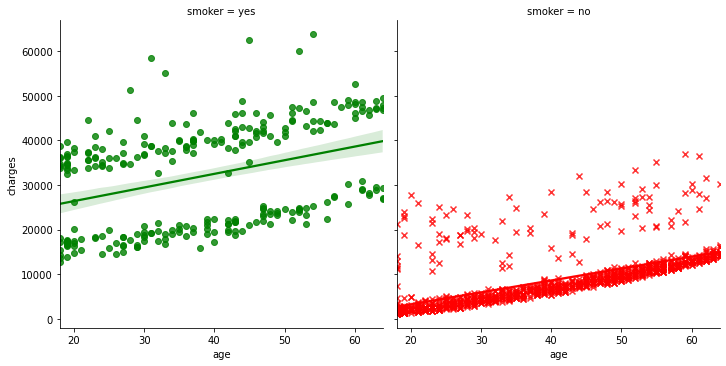

In [22]:
sns.lmplot(x='age', y='charges', hue='smoker',col='smoker', data=df, markers=['o','x'], palette={'yes':'g','no':'r'})
plt.show()

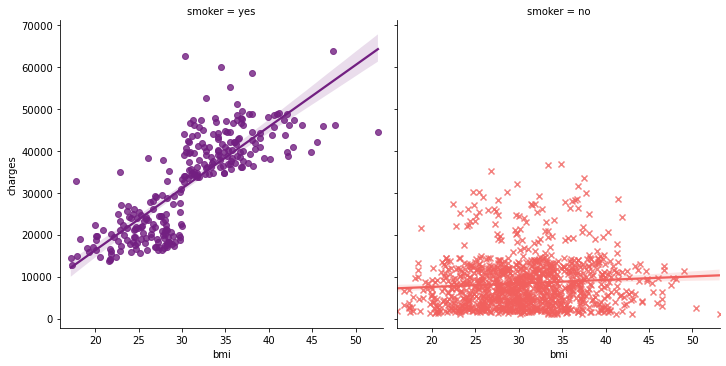

In [23]:
sns.lmplot(x='bmi', y='charges', hue='smoker',col='smoker', data=df, markers=['o','x'], palette='magma')
plt.show()

#### Importing libraries for modelling.

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error

### Linear Regression.

In [25]:
df2 = df1.copy()
X = df2.drop(columns='charges')
y = df2['charges']

#Applying a box-cox transformation on the target variable 'charges'.
y,param = stats.boxcox(y)
print("Optimal Lambda: ",param)

Optimal Lambda:  0.043649053770664956


Let us again look at the boxplot of the target variable "Charges" after we have applied a Box-Cox Transformation on it.

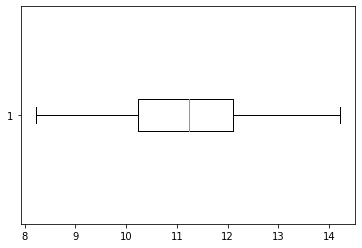

In [26]:
plt.boxplot(y,vert=False)
plt.show()

NO OUTLIERS. GREAT.

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
print('The shape of training dataset: ',X_train.shape)
print('The shape of testing dataset: ',X_test.shape)

The shape of training dataset:  (1070, 8)
The shape of testing dataset:  (268, 8)


In [28]:
#Scaling the data.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Fitting the Linear Regression Model.
model = LinearRegression()
model.fit(X_train,y_train)

print("Training Dataset Score: {:.2f}".format(model.score(X_train,y_train)))
print("Testing Dataset Score: {:.2f}".format(model.score(X_test,y_test)))

Training Dataset Score: 0.76
Testing Dataset Score: 0.81


In [30]:
y_pred = model.predict(X_test)
resid_lin = y_test - y_pred
std_resid_lin = (resid_lin-np.mean(resid_lin))/np.std(resid_lin)

In [31]:
print("Coefficient of Determination of the model(R^2 Score): {:.2f}".format(r2_score(y_test,y_pred)))

Coefficient of Determination of the model(R^2 Score): 0.81


In [32]:
print("Adjusted Coefficient of Determination: {:.2f}".format(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Adjusted Coefficient of Determination: 0.80


In [33]:
print("RMSE of Multiple Linear regression Model: %0.2f"%mean_squared_error(y_test,y_pred,squared=False))

RMSE of Multiple Linear regression Model: 0.62


#### Actual Vs Pedicted Values Plot

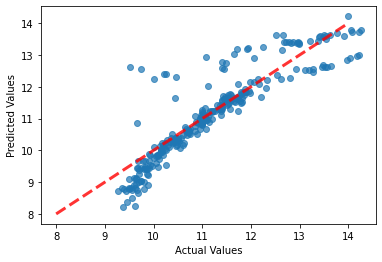

In [34]:
plt.scatter(y_pred,y_test,alpha = 0.7)
plt.plot([8,14],[8,14],lw=3,c='red',alpha=0.8,ls='--')
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")

plt.show()

The Actual Vs Predicted Values has a slightly non-linear realtionship.

#### Residual Plots

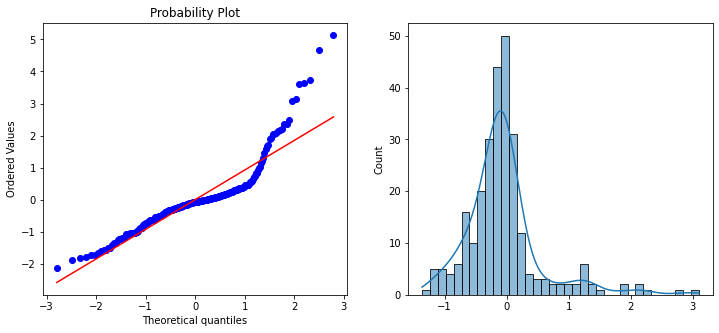

In [35]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
stats.probplot(std_resid_lin, dist='norm', plot=plt)

plt.subplot(1,2,2)
sns.histplot(resid_lin,kde=True)
plt.show()

#### Scatter Plots of Standardized Residuals against the Predictor Variables.

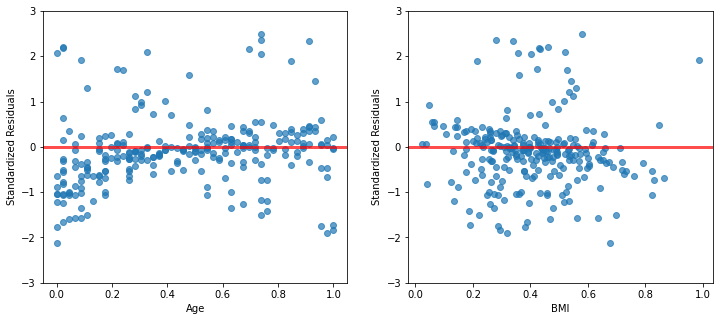

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0],std_resid_lin,alpha = 0.7)
plt.axhline(0,color = 'red', lw = 3,alpha = 0.7)
plt.ylim([-3,3])
plt.xlabel("Age")
plt.ylabel("Standardized Residuals")

plt.subplot(1,2,2)
plt.scatter(X_test[:,2],std_resid_lin,alpha = 0.7)
plt.axhline(0,color = 'red', lw = 3,alpha = 0.7)
plt.ylim([-3,3])
plt.xlabel("BMI")
plt.ylabel("Standardized Residuals")

plt.show()

Under the standard assumption of linear regression, the standardized residuals are uncorrelated with the predictor variables. It the assumption holds the plot should be a random scatter of points. From both graphs above we can see that the points are scattered almost randomly and can say that Standardized Residuals are uncorrelated with the predictor variables.

#### Standardized Residuals VS Fitted Values

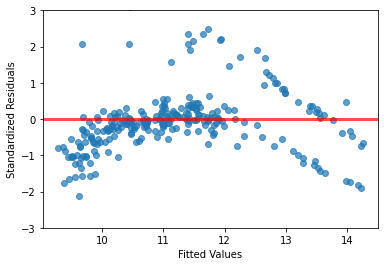

In [37]:
plt.scatter(y_pred,std_resid_lin,alpha = 0.7)
plt.axhline(0,color = 'red', lw = 3, alpha = 0.7)
plt.ylim([-3,3])
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")

plt.show()

Under the standard assumptions of linear regression, the standardized residuals is also uncorrelated with the fitted values. Therefore, this graph should also be a scatter of random points. As we can see from the graph above that there might be a non-linear relationship between the fitted values and the standardized residuals. 

Standardized Residuals are negative for low fitted values and positive for middle fitted values and again negative for high fitted values.

Let us check for the aurocorrelation by appling the Durbin Watson Test.

In [38]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resid_lin)

2.228061725800402

Since, the value lies between 1.5 - 2.5. We can say that there is no autocorreation.

### Polynomial Regression.

In [39]:
X = df2.drop(columns='charges')
y = df2['charges']

#Applying a box-cox transformation on the target variable 'charges'.
y,param = stats.boxcox(y)
print("Optimal Lambda: ",param)

Optimal Lambda:  0.043649053770664956


In [40]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X_poly = poly.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

In [41]:
#Scaling the data.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
pl_model = LinearRegression()
pl_model.fit(X_train,y_train)

print("The score of Polynomial Regression Model on training dataset:",pl_model.score(X_train,y_train))
print("The score of Polynomial Regression Model on testing dataset:",pl_model.score(X_test,y_test))

The score of Polynomial Regression Model on training dataset: 0.835848459669032
The score of Polynomial Regression Model on testing dataset: 0.8638054020370383


In [43]:
y_pred = pl_model.predict(X_test)
resid_pol = y_test - y_pred
std_resid_pol = (resid_pol-np.mean(resid_pol))/np.std(resid_pol)

In [44]:
print('Coefficient of Determination of the Polynomial Regression Model(R2 Score): ',round(r2_score(y_test,y_pred),3))

Coefficient of Determination of the Polynomial Regression Model(R2 Score):  0.864


In [45]:
print("Adjusted Coefficient of Determination: {:.2f}".format(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Adjusted Coefficient of Determination: 0.84


In [46]:
print("RMSE of Polynomial Regression Model: %0.2f"%mean_squared_error(y_test,y_pred,squared=False))

RMSE of Polynomial Regression Model: 0.52


#### Actual Vs Pedicted Values Plot

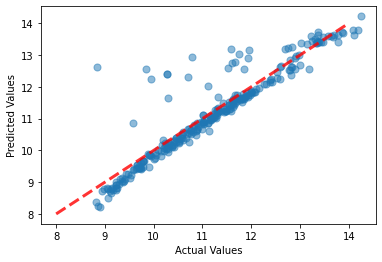

In [47]:
plt.scatter(y_pred,y_test,alpha = 0.5,s = 50)
plt.plot([8,14],[8,14],lw=3,c='red',alpha=0.8,ls='--')
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")

plt.show()

#### Residual Plots

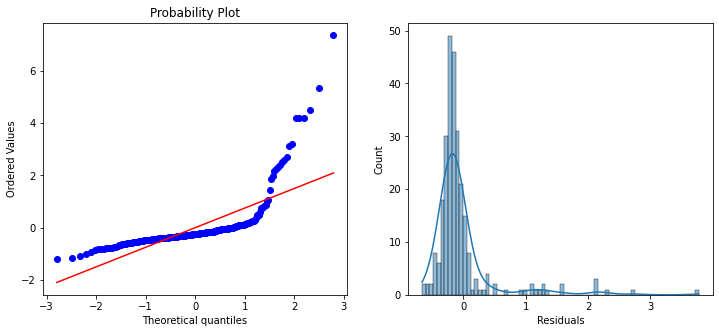

In [48]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
stats.probplot(std_resid_pol, dist='norm', plot=plt)

plt.subplot(1,2,2)
sns.histplot(resid_pol,kde=True)
plt.xlabel("Residuals")
plt.show()

#### Standardized Residuals VS Fitted Values

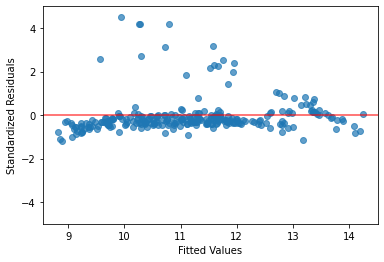

In [49]:
plt.scatter(y_pred,std_resid_pol,alpha=0.7)
plt.axhline(0,color='red',alpha=0.7)
plt.ylim([-5,5])
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

##### After comparing the various performance metrics and performance graphs of the above two models, we can conclud that the Polynomial Regression Model with degree 2 does a better job at predicting the charges of Medical insurance.